In [1]:
import pandas as pd
import sqlite3

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
view = pd.io.sql.read_sql("select strftime('%Y-%m-%d', datetime) as view_date, count(*) as views from pageviews where uid LIKE 'user_%' group by view_date", con=connect)

In [4]:
commit = pd.io.sql.read_sql("select strftime('%Y-%m-%d', timestamp) as commit_date, count(*) as commits from checker where uid LIKE 'user_%' group by commit_date", con=connect)

In [5]:
valid_dates = set(view.view_date) & set(commit.commit_date)

In [6]:
view = view[view.view_date.isin(valid_dates)]
commit = commit[commit.commit_date.isin(valid_dates)]

In [7]:
df = commit.merge(view, left_on='commit_date', right_on='view_date').drop(columns='view_date').rename(columns={'commit_date': 'date'})
# df.head()

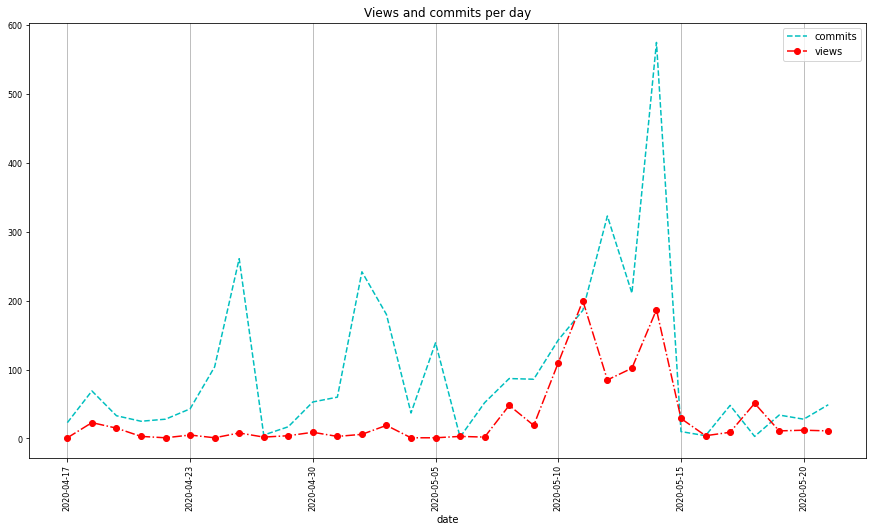

In [8]:
ax = df.plot(fontsize=8, figsize=(15, 8), rot=90, x='date', style=['c--', 'ro-.', ])
ax.set_title('Views and commits per day');
ax.xaxis.grid()

In [9]:
df[df['views'] > 150]

,date,commits,views
21,2020-05-11,186,200
24,2020-05-14,575,187


How many times the number of the views was larger than 150?

The answer is __2__